In [1]:
import os, sys
cur_dir = os.getcwd()
basename = os.path.basename(cur_dir)
for _ in range(5):
    if basename != 'OCLog':
        cur_dir = os.path.dirname(cur_dir)
        basename = os.path.basename(cur_dir)
        #print(cur_dir, basename)
    else:
        if cur_dir not in sys.path:
            sys.path.append(cur_dir)
            #print(sys.path)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tqdm import trange, tqdm, tnrange
from oclog.BGL.bglog import BGLog, get_embedding_layer
from oclog.openset.boundary_loss import euclidean_metric, BoundaryLoss
from oclog.openset.pretraining import LogLineEncoder, LogSeqEncoder, LogClassifier
# from oclog.openset.openset import OpenSet
from oclog.openset.opensetv4 import OpenSet
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
import sklearn.metrics as m
import warnings
warnings.filterwarnings('ignore')

In [3]:
bglog = BGLog(save_padded_num_sequences=False, load_from_pkl=True, )
train_test = bglog.get_tensor_train_test(ablation=1000)
train_data, test_data = train_test

padded_num_seq_df loaded from C:\Users\Bhujay_ROG\MyDev\OCLog\oclog\BGL\data\bgl_padded_num_seq_df.pkl
trained tokenizer, tk, loaded from C:\Users\Bhujay_ROG\MyDev\OCLog\oclog\BGL\data\bgltk.pkl
train_0:, 800
test_0:, 200
train_1:, 800
test_1:, 200
train_2:, 800
test_2:, 200
train_3:, 800
test_3:, 102
4 class does not have 800 records, it has only 628 records
test_4:, 0
5 class does not have 800 records, it has only 165 records
5 class does not have 200 records, it has only 165 records
6 class does not have 800 records, it has only 75 records
6 class does not have 200 records, it has only 75 records
[[1. 0. 0. 0.]
 [1. 0. 0. 0.]]
<BatchDataset element_spec=(TensorSpec(shape=(32, 32, 64), dtype=tf.int32, name=None), TensorSpec(shape=(32, 4), dtype=tf.float32, name=None))>
<BatchDataset element_spec=(TensorSpec(shape=(32, 32, 64), dtype=tf.int32, name=None), TensorSpec(shape=(32, 4), dtype=tf.float32, name=None))>


In [4]:
line_encoder = LogLineEncoder(bglog, chars_in_line=64)
logSeqencer =  LogSeqEncoder(line_in_seq=32)
ptmodel = LogClassifier(line_encoder=line_encoder, seq_encoder=logSeqencer, num_classes=4)
ptmodel.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
hist = ptmodel.fit(train_data, validation_data=test_data, epochs=1) 

vocab_size: 50
100/100 [==============================] - 11s 101ms/step - loss: 0.4636 - accuracy: 0.8128 - precision: 0.8919 - recall: 0.7347 - val_loss: 0.0431 - val_accuracy: 0.9866 - val_precision: 0.9896 - val_recall: 0.9866


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.53it/s]


epoch: 1/50, train_loss: 4.322241306304932, eval_score: 0.4957054355242361


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.55it/s]


epoch: 2/50, train_loss: 4.322242736816406, eval_score: 0.6261973122253294


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.52it/s]


epoch: 3/50, train_loss: 4.322243690490723, eval_score: 0.6688162160734524


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.54it/s]


epoch: 4/50, train_loss: 4.322244167327881, eval_score: 0.713610347830857


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.54it/s]


epoch: 5/50, train_loss: 4.322249889373779, eval_score: 0.7243470461403178


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.56it/s]


epoch: 6/50, train_loss: 4.322239875793457, eval_score: 0.7592668530603242


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.53it/s]


epoch: 7/50, train_loss: 4.32224178314209, eval_score: 0.7698439659476115


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.53it/s]


epoch: 8/50, train_loss: 4.322247505187988, eval_score: 0.7766199395851805


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.50it/s]


epoch: 9/50, train_loss: 4.322247505187988, eval_score: 0.782572697333543


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.56it/s]


epoch: 10/50, train_loss: 4.322247505187988, eval_score: 0.7864019134566186


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.39it/s]


epoch: 11/50, train_loss: 4.322249412536621, eval_score: 0.7891615841140649


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.39it/s]


epoch: 12/50, train_loss: 4.322249412536621, eval_score: 0.792446305142879


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.51it/s]


epoch: 13/50, train_loss: 4.322240829467773, eval_score: 0.7949554785164586


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.47it/s]


epoch: 14/50, train_loss: 4.322238445281982, eval_score: 0.7989061649760147


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.53it/s]


epoch: 15/50, train_loss: 4.3222455978393555, eval_score: 0.8024030181364775


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.54it/s]


epoch: 16/50, train_loss: 4.322241306304932, eval_score: 0.8038061235830422


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.52it/s]


epoch: 17/50, train_loss: 4.322251796722412, eval_score: 0.8046802447827016


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.53it/s]


epoch: 18/50, train_loss: 4.32225227355957, eval_score: 0.8065574969409652


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.51it/s]


epoch: 19/50, train_loss: 4.32224702835083, eval_score: 0.8081650612400485


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.49it/s]


epoch: 20/50, train_loss: 4.322244644165039, eval_score: 0.809913945311293


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.51it/s]


epoch: 21/50, train_loss: 4.322239398956299, eval_score: 0.8112332625405024


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.49it/s]


epoch: 22/50, train_loss: 4.3222551345825195, eval_score: 0.8115715625421954


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.49it/s]


epoch: 23/50, train_loss: 4.3222455978393555, eval_score: 0.8117441283096164


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.47it/s]


epoch: 24/50, train_loss: 4.322239875793457, eval_score: 0.8121598685140299


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.25it/s]


epoch: 25/50, train_loss: 4.322248458862305, eval_score: 0.8129888139216103


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.60it/s]


epoch: 26/50, train_loss: 4.322249889373779, eval_score: 0.8138143964674965


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.61it/s]


epoch: 27/50, train_loss: 4.322240829467773, eval_score: 0.8146366365739258


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.61it/s]


epoch: 28/50, train_loss: 4.322242736816406, eval_score: 0.8146366365739258


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.59it/s]


epoch: 29/50, train_loss: 4.322249889373779, eval_score: 0.8154555544981069


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.59it/s]


epoch: 30/50, train_loss: 4.3222527503967285, eval_score: 0.816271170333884


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.58it/s]


epoch: 31/50, train_loss: 4.322242259979248, eval_score: 0.8165978221326591


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.62it/s]


epoch: 32/50, train_loss: 4.322242259979248, eval_score: 0.8170043980024573


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.60it/s]


epoch: 33/50, train_loss: 4.322246551513672, eval_score: 0.8170043980024573


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.61it/s]


epoch: 34/50, train_loss: 4.3222432136535645, eval_score: 0.8171655453717267


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.61it/s]


epoch: 35/50, train_loss: 4.322240829467773, eval_score: 0.8173378893322487


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.59it/s]


epoch: 36/50, train_loss: 4.322243690490723, eval_score: 0.8173378893322487


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.60it/s]


epoch: 37/50, train_loss: 4.322244167327881, eval_score: 0.8173378893322487


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.61it/s]


epoch: 38/50, train_loss: 4.322243690490723, eval_score: 0.8173378893322487


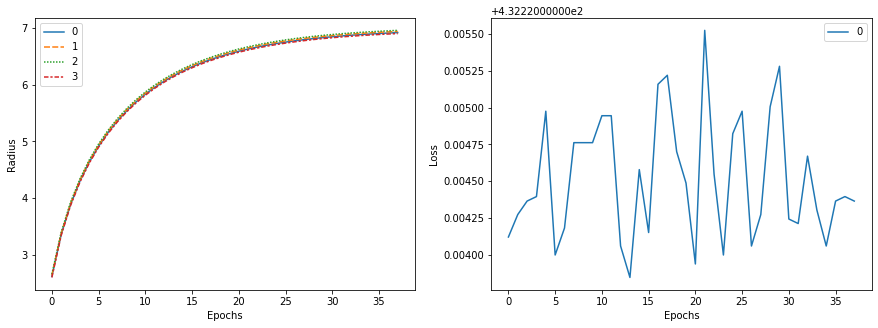

In [5]:
oset = OpenSet(4, ptmodel)
_, _ = oset.train(train_data, epochs=50, lr_rate=2, wait_patient=3)

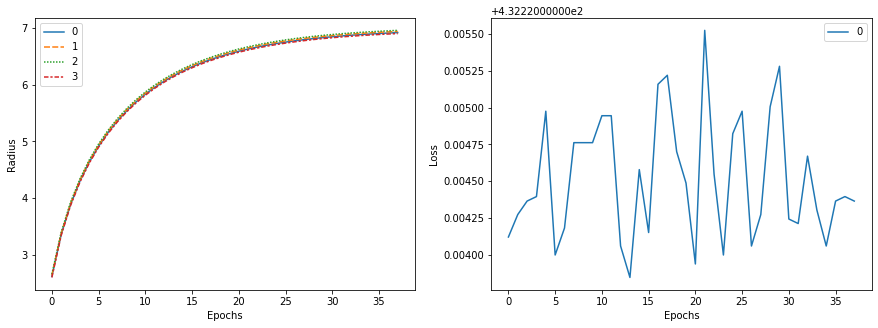

euc_dis: tf.Tensor(
[1.7313002 4.2338777 2.7695127 1.3456036 2.389917  7.963277  2.062164
 2.347791  3.094213  6.5403247 3.7152324 6.0438175 2.580769  3.5981982
 2.693632  2.370397  2.4413848 6.0601006 2.754422  1.7313374 3.1460788
 2.5777457 4.6769657 3.2006006 3.7180722 6.8219013 4.3618608 5.267108
 2.0339284 4.2512965 1.9316493 9.400277 ], shape=(32,), dtype=float32)
pred_radius: tf.Tensor(
[6.875246  6.9321666 6.875246  6.875246  6.892925  6.913581  6.875246
 6.892925  6.9321666 6.913581  6.9321666 6.913581  6.892925  6.9321666
 6.875246  6.892925  6.892925  6.9321666 6.892925  6.875246  6.9321666
 6.892925  6.913581  6.9321666 6.9321666 6.913581  6.9321666 6.913581
 6.892925  6.9321666 6.875246  6.913581 ], shape=(32,), dtype=float32)
predictions with unknown-9999: [   3    2    3    3    0 9999    3    0    2    1    2    1    0    2
    3    0    0    2    0    3    2    0    1    2    2    1    2    1
    0    2    3 9999]
[[776   0   0   0  24]
 [  0 192   0   0 608]
 [  0   0

In [12]:
oset.plot_radius_chages()
preds = oset.openpredict(oset.features)
y_true, y_pred, _ = oset.evaluate(train_data)

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.43it/s]


epoch: 1/50, train_loss: 4.302145957946777, eval_score: 0.5916902395839778


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.40it/s]


epoch: 2/50, train_loss: 4.302150726318359, eval_score: 0.7030850200031012


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.24it/s]


epoch: 3/50, train_loss: 4.302145481109619, eval_score: 0.7531064047364892


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.39it/s]


epoch: 4/50, train_loss: 4.302157402038574, eval_score: 0.7735851729329534


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.47it/s]


epoch: 5/50, train_loss: 4.302155017852783, eval_score: 0.7853869499778884


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.39it/s]


epoch: 6/50, train_loss: 4.30215311050415, eval_score: 0.7936040600749101


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.37it/s]


epoch: 7/50, train_loss: 4.302159309387207, eval_score: 0.8037849775948716


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.39it/s]


epoch: 8/50, train_loss: 4.302151679992676, eval_score: 0.8107479736682572


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.39it/s]


epoch: 9/50, train_loss: 4.30216646194458, eval_score: 0.8154555544981069


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.36it/s]


epoch: 10/50, train_loss: 4.302154064178467, eval_score: 0.8180228578480098


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.41it/s]


epoch: 11/50, train_loss: 4.302158355712891, eval_score: 0.8222350530184585


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.42it/s]


epoch: 12/50, train_loss: 4.302161693572998, eval_score: 0.8246918297570666


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.41it/s]


epoch: 13/50, train_loss: 4.30216646194458, eval_score: 0.8273064678797064


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.41it/s]


epoch: 14/50, train_loss: 4.302176475524902, eval_score: 0.8285947654103538


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.39it/s]


epoch: 15/50, train_loss: 4.302149772644043, eval_score: 0.83139527512727


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.39it/s]


epoch: 16/50, train_loss: 4.3021392822265625, eval_score: 0.8318744501795001


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.40it/s]


epoch: 17/50, train_loss: 4.302157878875732, eval_score: 0.8348645441147885


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.39it/s]


epoch: 18/50, train_loss: 4.302160739898682, eval_score: 0.849893899378238


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.43it/s]


epoch: 19/50, train_loss: 4.302148342132568, eval_score: 0.8567635317271961


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.37it/s]


epoch: 20/50, train_loss: 4.302147388458252, eval_score: 0.8584443753974034


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.34it/s]


epoch: 21/50, train_loss: 4.302154541015625, eval_score: 0.8584443753974034


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.53it/s]


epoch: 22/50, train_loss: 4.30216121673584, eval_score: 0.8587787021109843


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.53it/s]


epoch: 23/50, train_loss: 4.302155017852783, eval_score: 0.8596044474357637


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.50it/s]


epoch: 24/50, train_loss: 4.302150726318359, eval_score: 0.861258806960009


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.37it/s]


epoch: 25/50, train_loss: 4.302155017852783, eval_score: 0.8627446281834082


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.52it/s]


epoch: 26/50, train_loss: 4.302159309387207, eval_score: 0.8648522201497906


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.50it/s]


epoch: 27/50, train_loss: 4.302151679992676, eval_score: 0.8648522201497906


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.51it/s]


epoch: 28/50, train_loss: 4.3021559715271, eval_score: 0.8655011604570042


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.55it/s]


epoch: 29/50, train_loss: 4.302148818969727, eval_score: 0.8658247560279868


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.55it/s]


epoch: 30/50, train_loss: 4.302159786224365, eval_score: 0.8661477706374415


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.44it/s]


epoch: 31/50, train_loss: 4.302158355712891, eval_score: 0.8669499867142076


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.50it/s]


epoch: 32/50, train_loss: 4.302152633666992, eval_score: 0.8675919741341396


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.54it/s]


epoch: 33/50, train_loss: 4.302167892456055, eval_score: 0.8679121072711565


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.56it/s]


epoch: 34/50, train_loss: 4.302152633666992, eval_score: 0.8682316687418574


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.56it/s]


epoch: 35/50, train_loss: 4.302140712738037, eval_score: 0.8685506600761254


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.55it/s]


epoch: 36/50, train_loss: 4.302151203155518, eval_score: 0.8685506600761254


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.57it/s]


epoch: 37/50, train_loss: 4.30214786529541, eval_score: 0.8685506600761254


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.56it/s]


epoch: 38/50, train_loss: 4.3021626472473145, eval_score: 0.869186938427648


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.58it/s]


epoch: 39/50, train_loss: 4.302154541015625, eval_score: 0.869186938427648


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.57it/s]


epoch: 40/50, train_loss: 4.302160263061523, eval_score: 0.8690593886198442


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.55it/s]


epoch: 41/50, train_loss: 4.302151679992676, eval_score: 0.8690593886198442


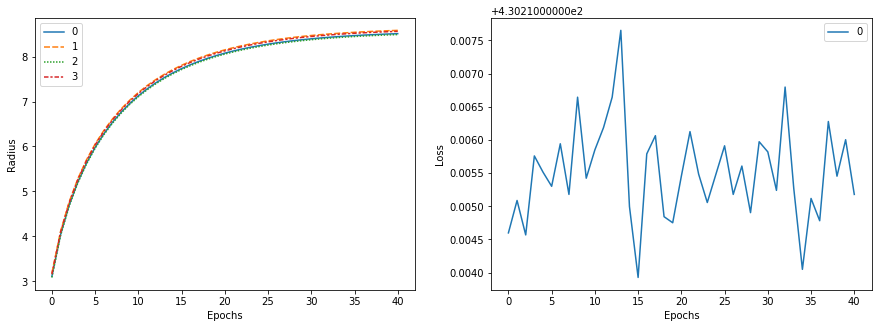

In [13]:
oset = OpenSet(4, ptmodel)
_, _ = oset.train(train_data, epochs=50, lr_rate=2.5, wait_patient=3)

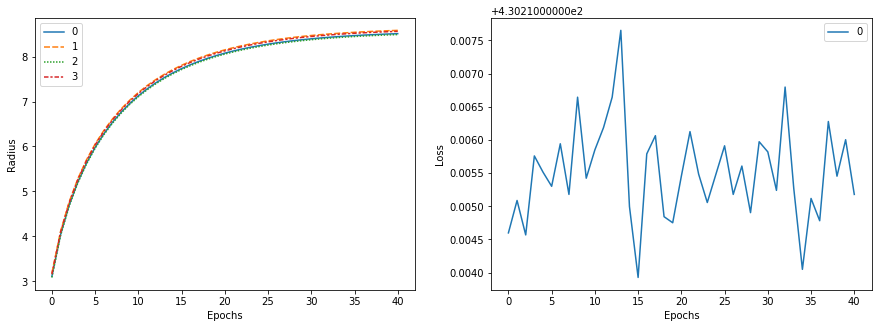

euc_dis: tf.Tensor(
[ 1.9447893  2.702507   1.5760046  2.68675    3.5202348  9.051089
  3.9535155  1.9447893  3.1403213  4.6769514  3.9535155  2.2205405
 20.04435    2.269899   2.3696203  3.9535155  1.831615  10.215673
  7.995566   6.821886   2.379185   3.0215209  2.4708028  2.4734955
  3.9535155  4.4631143  2.149302   2.4021716  2.8786128  3.6504035
  2.414001   2.564501 ], shape=(32,), dtype=float32)
pred_radius: tf.Tensor(
[8.465336 8.537254 8.537254 8.537254 8.537254 8.537254 8.485948 8.465336
 8.465336 8.559495 8.485948 8.537254 8.559495 8.485948 8.485948 8.485948
 8.537254 8.559495 8.537254 8.559495 8.465336 8.537254 8.465336 8.485948
 8.485948 8.465336 8.465336 8.485948 8.537254 8.465336 8.485948 8.537254], shape=(32,), dtype=float32)
predictions with unknown-9999: [   2    3    3    3    3 9999    0    2    2    1    0    3 9999    0
    0    0    3 9999    3    1    2    3    2    0    0    2    2    0
    3    2    0    3]
[[792   0   0   0   8]
 [  0 322   0   0 478]
 [  0  

In [14]:
oset.plot_radius_chages()
preds = oset.openpredict(oset.features)
y_true, y_pred, _ = oset.evaluate(train_data)

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:14<00:00,  7.07it/s]


epoch: 1/50, train_loss: 4.301329612731934, eval_score: 0.7222842399774213


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.24it/s]


epoch: 2/50, train_loss: 4.301342010498047, eval_score: 0.7949226828751083


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:14<00:00,  7.06it/s]


epoch: 3/50, train_loss: 4.301339626312256, eval_score: 0.8212658144568747


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.24it/s]


epoch: 4/50, train_loss: 4.301332473754883, eval_score: 0.849893899378238


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:14<00:00,  7.09it/s]


epoch: 5/50, train_loss: 4.301333427429199, eval_score: 0.8698716755728723


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.24it/s]


epoch: 6/50, train_loss: 4.301332473754883, eval_score: 0.9151909189656589


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.34it/s]


epoch: 7/50, train_loss: 4.3013386726379395, eval_score: 0.9410457780384057


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.31it/s]


epoch: 8/50, train_loss: 4.301335334777832, eval_score: 0.9434056309589595


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.34it/s]


epoch: 9/50, train_loss: 4.301331996917725, eval_score: 0.9435475457729791


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.30it/s]


epoch: 10/50, train_loss: 4.301331996917725, eval_score: 0.9453141677132257


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.38it/s]


epoch: 11/50, train_loss: 4.301336765289307, eval_score: 0.9459958275962503


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.38it/s]


epoch: 12/50, train_loss: 4.301334381103516, eval_score: 0.9462373288088949


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.39it/s]


epoch: 13/50, train_loss: 4.301332473754883, eval_score: 0.9460832624711734


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.36it/s]


epoch: 14/50, train_loss: 4.301335334777832, eval_score: 0.9464763137536372


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.38it/s]


epoch: 15/50, train_loss: 4.301333904266357, eval_score: 0.9469194544356231


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.40it/s]


epoch: 16/50, train_loss: 4.301331996917725, eval_score: 0.9470836370244331


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.38it/s]


epoch: 17/50, train_loss: 4.301328659057617, eval_score: 0.9467770762919776


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.37it/s]


epoch: 18/50, train_loss: 4.301331520080566, eval_score: 0.9466664005294548


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.32it/s]


epoch: 19/50, train_loss: 4.301335334777832, eval_score: 0.9465133035033595


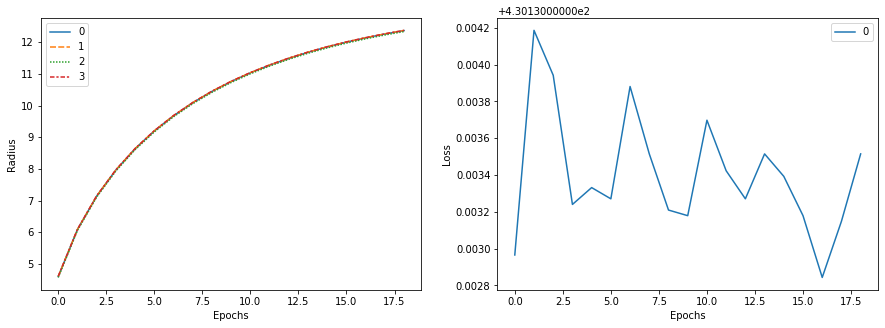

In [15]:
oset = OpenSet(4, ptmodel)
_, _ = oset.train(train_data, epochs=50, lr_rate=4, wait_patient=3)

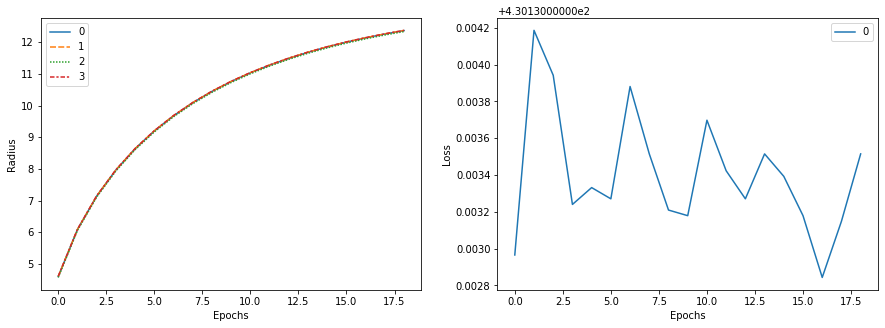

euc_dis: tf.Tensor(
[ 6.387276  20.044357   1.9447554  2.4665153  8.992263   2.6408706
  2.3930242  2.7117534  9.267506   6.552468   2.3193521  4.676952
  3.4980001 20.044357   3.1909266  3.9535165  4.2661176 10.215684
 11.845437  20.044357   4.35994    7.256172   1.9940346  5.7739787
 20.044357   2.5635235  1.270435   1.6792512  7.911362   2.592391
  9.436779   6.0363126], shape=(32,), dtype=float32)
pred_radius: tf.Tensor(
[12.009206 12.00642  11.971519 12.009206 12.00642  12.002002 12.002002
 12.009206 12.00642  12.002002 12.002002 12.00642  11.971519 12.00642
 12.009206 12.002002 12.009206 12.00642  12.009206 12.00642  11.971519
 12.00642  12.009206 12.00642  12.00642  12.002002 12.009206 11.971519
 12.00642  12.009206 12.00642  12.009206], shape=(32,), dtype=float32)
predictions with unknown-9999: [   3 9999    2    3    1    0    0    3    1    0    0    1    2 9999
    3    0    3    1    3 9999    2    1    3    1 9999    0    3    2
    1    3    1    3]
[[799   0   0   0   1]

In [16]:
oset.plot_radius_chages()
preds = oset.openpredict(oset.features)
y_true, y_pred, _ = oset.evaluate(train_data)

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.19it/s]


epoch: 1/50, train_loss: 4.302599906921387, eval_score: 0.7219302106188463


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.17it/s]


epoch: 2/50, train_loss: 4.302594184875488, eval_score: 0.7949804372506523


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.20it/s]


epoch: 3/50, train_loss: 4.302590847015381, eval_score: 0.8211103831915781


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.28it/s]


epoch: 4/50, train_loss: 4.302593231201172, eval_score: 0.8488415121277585


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.25it/s]


epoch: 5/50, train_loss: 4.3025946617126465, eval_score: 0.8697030625961272


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.32it/s]


epoch: 6/50, train_loss: 4.302590847015381, eval_score: 0.9147023343824191


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.19it/s]


epoch: 7/50, train_loss: 4.302588939666748, eval_score: 0.940880965074537


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:14<00:00,  7.11it/s]


epoch: 8/50, train_loss: 4.302596092224121, eval_score: 0.9434056309589595


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.29it/s]


epoch: 9/50, train_loss: 4.302591323852539, eval_score: 0.9435475457729791


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.28it/s]


epoch: 10/50, train_loss: 4.30259370803833, eval_score: 0.9453141677132257


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:14<00:00,  6.96it/s]


epoch: 11/50, train_loss: 4.302589416503906, eval_score: 0.9459958275962503


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:14<00:00,  6.81it/s]


epoch: 12/50, train_loss: 4.302589416503906, eval_score: 0.9462373288088949


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:14<00:00,  6.70it/s]


epoch: 13/50, train_loss: 4.302596092224121, eval_score: 0.9460832624711734


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.27it/s]


epoch: 14/50, train_loss: 4.302597522735596, eval_score: 0.9464763137536372


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.31it/s]


epoch: 15/50, train_loss: 4.3025898933410645, eval_score: 0.9467562928230723


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.33it/s]


epoch: 16/50, train_loss: 4.302590370178223, eval_score: 0.9470836370244331


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.39it/s]


epoch: 17/50, train_loss: 4.302595138549805, eval_score: 0.9469301508099558


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.35it/s]


epoch: 18/50, train_loss: 4.302597999572754, eval_score: 0.9466664005294548


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.41it/s]


epoch: 19/50, train_loss: 4.3025922775268555, eval_score: 0.9465133035033595


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.40it/s]


epoch: 20/50, train_loss: 4.302591323852539, eval_score: 0.9465167455966419


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.34it/s]


epoch: 21/50, train_loss: 4.302590847015381, eval_score: 0.9465268007790134


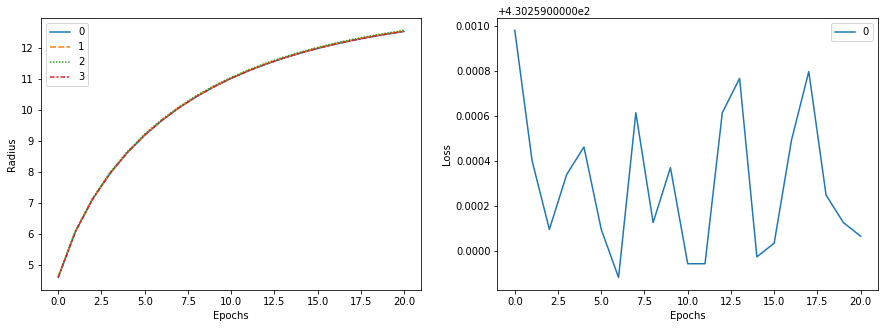

In [17]:
oset = OpenSet(4, ptmodel)
_, _ = oset.train(train_data, epochs=50, lr_rate=4, wait_patient=5)

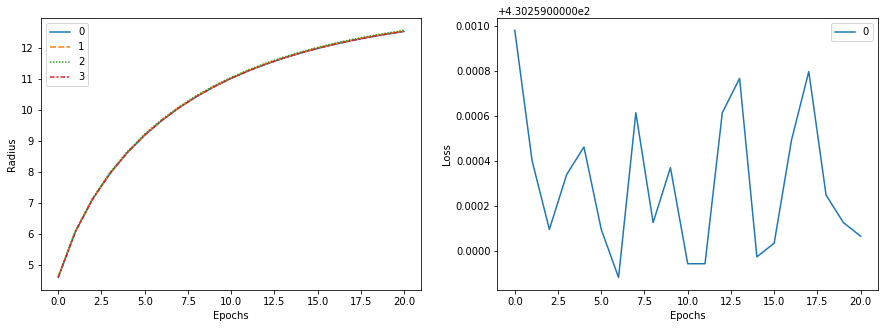

euc_dis: tf.Tensor(
[ 2.210126  10.102591   8.732525   3.9535215  5.7225385  1.9447547
  7.969595   6.299624   2.537007   2.131966   2.3516226  2.3647175
  3.9535215  1.9447547  8.894159   2.5514169  3.5302424  7.86442
  4.7916183  6.180152   3.9535215  1.9447547  3.4954348  2.5825381
  2.225265   7.988463   2.6150973  3.2121415  9.285187   3.2688665
  4.2281947  2.737173 ], shape=(32,), dtype=float32)
pred_radius: tf.Tensor(
[12.01807  11.998112 11.998112 11.981534 11.98638  12.01807  11.998112
 12.01807  11.981534 11.981534 11.981534 11.981534 11.981534 12.01807
 11.998112 11.98638  12.01807  11.981534 11.998112 11.998112 11.981534
 12.01807  12.01807  11.98638  11.98638  11.998112 11.98638  12.01807
 11.998112 12.01807  12.01807  12.01807 ], shape=(32,), dtype=float32)
predictions with unknown-9999: [2 1 1 0 3 2 1 2 0 0 0 0 0 2 1 3 2 0 1 1 0 2 2 3 3 1 3 2 1 2 2 2]
[[799   0   0   0   1]
 [ 14 630   0   0 156]
 [  0   0 761  38   1]
 [  2   6  13 765  14]
 [  0   0   0   0   0]]
92.3

In [18]:
oset.plot_radius_chages()
preds = oset.openpredict(oset.features)
y_true, y_pred, _ = oset.evaluate(train_data)

Epoch 1/15
100/100 [==============================] - 10s 98ms/step - loss: 0.0538 - accuracy: 0.9816 - precision: 0.9828 - recall: 0.9809 - val_loss: 0.0306 - val_accuracy: 0.9911 - val_precision: 0.9911 - val_recall: 0.9896
Epoch 2/15
100/100 [==============================] - 10s 95ms/step - loss: 0.0482 - accuracy: 0.9822 - precision: 0.9828 - recall: 0.9819 - val_loss: 0.0430 - val_accuracy: 0.9851 - val_precision: 0.9866 - val_recall: 0.9851
Epoch 3/15
100/100 [==============================] - 9s 95ms/step - loss: 0.0152 - accuracy: 0.9941 - precision: 0.9947 - recall: 0.9941 - val_loss: 0.0077 - val_accuracy: 0.9955 - val_precision: 0.9955 - val_recall: 0.9955
Epoch 4/15
100/100 [==============================] - 10s 95ms/step - loss: 0.0174 - accuracy: 0.9928 - precision: 0.9931 - recall: 0.9928 - val_loss: 0.0049 - val_accuracy: 0.9985 - val_precision: 0.9985 - val_recall: 0.9985
Epoch 5/15
100/100 [==============================] - 9s 95ms/step - loss: 0.0086 - accuracy: 0.9

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.32it/s]


epoch: 1/50, train_loss: 8.937414169311523, eval_score: 0.21115319287611864


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.42it/s]


epoch: 2/50, train_loss: 8.937411308288574, eval_score: 0.30761257643701223


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.35it/s]


epoch: 3/50, train_loss: 8.937414169311523, eval_score: 0.426767031484668


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.35it/s]


epoch: 4/50, train_loss: 8.93741226196289, eval_score: 0.5140613315473487


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.35it/s]


epoch: 5/50, train_loss: 8.937413215637207, eval_score: 0.6067876595832868


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.31it/s]


epoch: 6/50, train_loss: 8.937413215637207, eval_score: 0.6829764715299071


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.31it/s]


epoch: 7/50, train_loss: 8.937414169311523, eval_score: 0.7463930346965362


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.30it/s]


epoch: 8/50, train_loss: 8.937411308288574, eval_score: 0.7881343580889731


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.34it/s]


epoch: 9/50, train_loss: 8.937414169311523, eval_score: 0.8150050897748028


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.35it/s]


epoch: 10/50, train_loss: 8.93741226196289, eval_score: 0.8566573421847714


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.36it/s]


epoch: 11/50, train_loss: 8.93741226196289, eval_score: 0.8687483594113946


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.30it/s]


epoch: 12/50, train_loss: 8.93741226196289, eval_score: 0.880758186145049


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.34it/s]


epoch: 13/50, train_loss: 8.937413215637207, eval_score: 0.8893926357930384


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.30it/s]


epoch: 14/50, train_loss: 8.93741226196289, eval_score: 0.8957891281526106


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.34it/s]


epoch: 15/50, train_loss: 8.937409400939941, eval_score: 0.9005982067045065


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.34it/s]


epoch: 16/50, train_loss: 8.937414169311523, eval_score: 0.9033888753392254


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.33it/s]


epoch: 17/50, train_loss: 8.93741226196289, eval_score: 0.9057042328917785


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.35it/s]


epoch: 18/50, train_loss: 8.937411308288574, eval_score: 0.9074728037263255


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.32it/s]


epoch: 19/50, train_loss: 8.937416076660156, eval_score: 0.9086256875416225


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.36it/s]


epoch: 20/50, train_loss: 8.937411308288574, eval_score: 0.9105306728446106


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.34it/s]


epoch: 21/50, train_loss: 8.93741226196289, eval_score: 0.9113370920420063


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.36it/s]


epoch: 22/50, train_loss: 8.937409400939941, eval_score: 0.9126944797845684


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.34it/s]


epoch: 23/50, train_loss: 8.937414169311523, eval_score: 0.9130728951606705


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.34it/s]


epoch: 24/50, train_loss: 8.937411308288574, eval_score: 0.9138449056127483


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.34it/s]


epoch: 25/50, train_loss: 8.93741226196289, eval_score: 0.9140326866975598


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:14<00:00,  7.05it/s]


epoch: 26/50, train_loss: 8.937409400939941, eval_score: 0.9157285533300665


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.29it/s]


epoch: 27/50, train_loss: 8.93741226196289, eval_score: 0.9162888218854609


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.36it/s]


epoch: 28/50, train_loss: 8.93741226196289, eval_score: 0.9168468005148793


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.48it/s]


epoch: 29/50, train_loss: 8.937414169311523, eval_score: 0.9174211660527799


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.36it/s]


epoch: 30/50, train_loss: 8.937414169311523, eval_score: 0.9179198235735118


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.46it/s]


epoch: 31/50, train_loss: 8.937413215637207, eval_score: 0.9184773313085887


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.45it/s]


epoch: 32/50, train_loss: 8.937409400939941, eval_score: 0.9188837511158644


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.47it/s]


epoch: 33/50, train_loss: 8.937414169311523, eval_score: 0.919259570872709


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.48it/s]


epoch: 34/50, train_loss: 8.93741226196289, eval_score: 0.9194438006219449


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.47it/s]


epoch: 35/50, train_loss: 8.937414169311523, eval_score: 0.9198153045946467


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.49it/s]


epoch: 36/50, train_loss: 8.93741226196289, eval_score: 0.9201863027412123


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.35it/s]


epoch: 37/50, train_loss: 8.937411308288574, eval_score: 0.9203890787446999


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.46it/s]


epoch: 38/50, train_loss: 8.937411308288574, eval_score: 0.9205760902356209


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.47it/s]


epoch: 39/50, train_loss: 8.937410354614258, eval_score: 0.9207785777952915


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.45it/s]


epoch: 40/50, train_loss: 8.93741226196289, eval_score: 0.9209653338060337


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.48it/s]


epoch: 41/50, train_loss: 8.93741226196289, eval_score: 0.9211518348597647


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.47it/s]


epoch: 42/50, train_loss: 8.937413215637207, eval_score: 0.9213380814782245


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.47it/s]


epoch: 43/50, train_loss: 8.93741226196289, eval_score: 0.9217047969180447


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.22it/s]


epoch: 44/50, train_loss: 8.93741226196289, eval_score: 0.9217047969180447


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.15it/s]


epoch: 45/50, train_loss: 8.937414169311523, eval_score: 0.9217047969180447


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.31it/s]


epoch: 46/50, train_loss: 8.93741226196289, eval_score: 0.9217047969180447


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.33it/s]


epoch: 47/50, train_loss: 8.93741226196289, eval_score: 0.9220765289290034


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.36it/s]


epoch: 48/50, train_loss: 8.937411308288574, eval_score: 0.9220765289290034


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.44it/s]


epoch: 49/50, train_loss: 8.93741226196289, eval_score: 0.9220765289290034


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.43it/s]


epoch: 50/50, train_loss: 8.937411308288574, eval_score: 0.9220765289290034


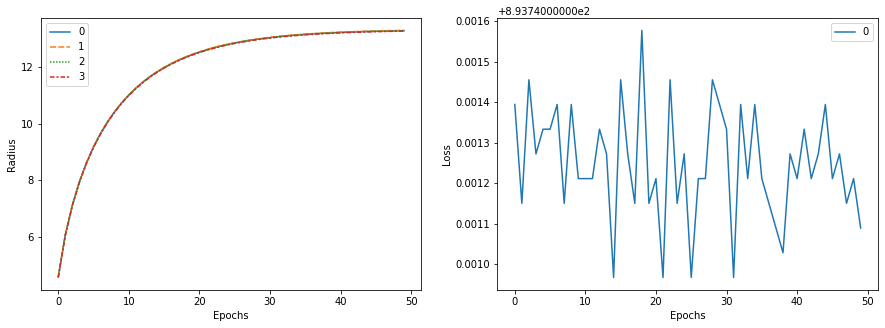

In [19]:
hist = ptmodel.fit(train_data, validation_data=test_data, epochs=15) 
oset = OpenSet(4, ptmodel)
_, _ = oset.train(train_data, epochs=50, lr_rate=4, wait_patient=5)

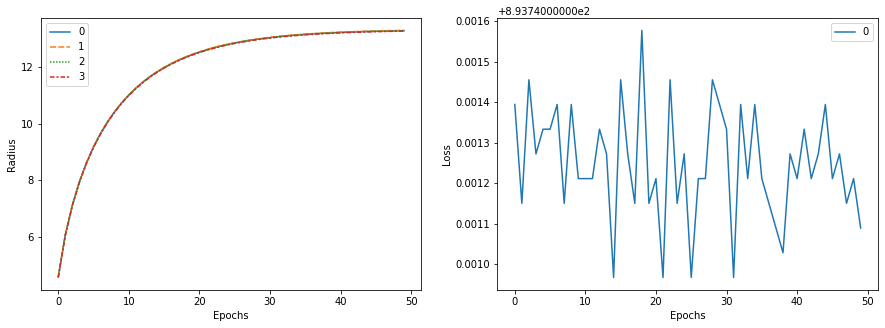

euc_dis: tf.Tensor(
[ 9.614662   5.4582076  6.9938836 24.21584    2.7913115  4.922122
 19.329752   9.499025  10.784953  10.645767   9.833957   9.36719
 11.7771635 10.354628   3.0973918  9.714681  10.610325   3.2147832
  6.1855597 24.21584    6.1855597  5.7052727  9.687576   8.8077965
  3.1754613 10.878142   7.132968  11.322821   8.290403   6.1855597
 14.400247   4.5518064], shape=(32,), dtype=float32)
pred_radius: tf.Tensor(
[13.254744 13.270642 13.281545 13.281545 13.270642 13.26989  13.26989
 13.254744 13.26989  13.26989  13.26989  13.281545 13.254744 13.26989
 13.270642 13.281545 13.281545 13.270642 13.281545 13.281545 13.281545
 13.254744 13.281545 13.26989  13.270642 13.281545 13.270642 13.270642
 13.270642 13.281545 13.281545 13.270642], shape=(32,), dtype=float32)
predictions with unknown-9999: [   3    0    1 9999    0    2 9999    3    2    2    2    1    3    2
    0    1    1    0    1 9999    1    3    1    2    0    1    0    0
    0    1 9999    0]
[[798   0   0   0   2]


In [20]:
oset.plot_radius_chages()
preds = oset.openpredict(oset.features)
y_true, y_pred, _ = oset.evaluate(train_data)